#**Classification of Autism Children**

##Libraries

In [ ]:
import pandas as pd
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

##Datasets

Source : [https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children](https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children)

In [ ]:
url = "https://raw.githubusercontent.com/cakkamidi/children-autism-classification/main/csv_result-Autism-Child-Data.csv"
df = pd.read_csv(url)
df.describe()
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,?,no,no,Jordan,yes,5,4-11 years,?,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,?,yes,no,Jordan,no,4,4-11 years,?,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
df_is_nan = df.isin(['?']).sum()

df_is_nan

id                  0
A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

In [ ]:
df = df.replace('?', np.nan)

df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [ ]:
df.dtypes

id                  int64
A1_Score            int64
A2_Score            int64
A3_Score            int64
A4_Score            int64
A5_Score            int64
A6_Score            int64
A7_Score            int64
A8_Score            int64
A9_Score            int64
A10_Score           int64
age                object
gender             object
ethnicity          object
jundice            object
austim             object
contry_of_res      object
used_app_before    object
result              int64
age_desc           object
relation           object
Class/ASD          object
dtype: object

###Replace Null Values

*   Unknown values of '*age*' feature are replaced by the median
*   Unknown values of '*ethnicity*' feature are replaced by '*Others*'
*   Unknown values of '*relation*' feature are replaced by '*Unknown*'

In [ ]:
# Objects in 'age' feature are converted to integer to calculate median
df['age'] = df['age'].astype('Int64')

df['age'] = df['age'].fillna(df['age'].median())
df['ethnicity'] = df['ethnicity'].fillna('Others')
df['relation'] = df['relation'].fillna('Unknown')
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,Others,no,no,Jordan,yes,5,4-11 years,Unknown,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,Others,yes,no,Jordan,no,4,4-11 years,Unknown,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


###Convert Categorical Features into Numerics

In [ ]:
le = LabelEncoder()

label0 = le.fit_transform(df['gender'])
label1 = le.fit_transform(df['ethnicity'])
label2 = le.fit_transform(df['jundice'])
label3 = le.fit_transform(df['austim'])
label4 = le.fit_transform(df['contry_of_res'])
label5 = le.fit_transform(df['used_app_before'])
label6 = le.fit_transform(df['age_desc'])
label7 = le.fit_transform(df['relation'])
label8 = le.fit_transform(df['Class/ASD'])

df.drop("gender", axis=1, inplace=True)
df.drop("ethnicity", axis=1, inplace=True)
df.drop("jundice", axis=1, inplace=True)
df.drop("austim", axis=1, inplace=True)
df.drop("contry_of_res", axis=1, inplace=True)
df.drop("used_app_before", axis=1, inplace=True)
df.drop("age_desc", axis=1, inplace=True)
df.drop("relation", axis=1, inplace=True)
df.drop("Class/ASD", axis=1, inplace=True)

df["gender"] = label0
df["ethnicity"] = label1
df["jundice"] = label2
df["austim"] = label3
df["contry_of_res"] = label4
df["used_app_before"] = label5
df["age_desc"] = label6
df["relation"] = label7
df["Class/ASD"] = label8

df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,result,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,5,1,5,0,0,24,0,0,1,0
1,2,1,1,0,0,1,1,0,1,0,...,5,1,4,0,0,24,0,0,1,0
2,3,1,1,0,0,0,1,1,1,0,...,5,1,5,0,0,24,1,0,4,0
3,4,0,1,0,0,1,1,0,0,0,...,4,0,5,1,0,24,0,0,4,0
4,5,1,1,1,1,1,1,1,1,1,...,10,1,5,1,0,51,0,0,1,1


##Split Train, Validation, and Test Data

In [ ]:
# Extract the feature columns from the DataFrame
X = df.drop('Class/ASD', axis=1)

# Extract the label column from the DataFrame
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

##**Base KNN Classifier**

3 k values :
*   k = 3
*   k = 5
*   k = 7

Metrics for k = 3
Validation Accuracy: 0.576271186440678
Validation Precision: 0.5792587674763726
Validation Recall: 0.576271186440678
Validation F1 Score: 0.5762711864406779



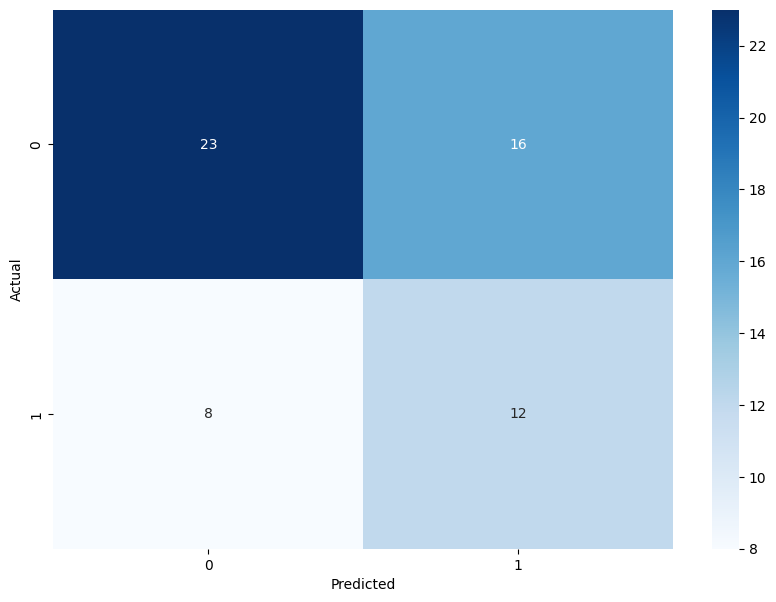

Metrics for k = 5
Validation Accuracy: 0.6610169491525424
Validation Precision: 0.6616626311541566
Validation Recall: 0.6610169491525424
Validation F1 Score: 0.6582513531666074



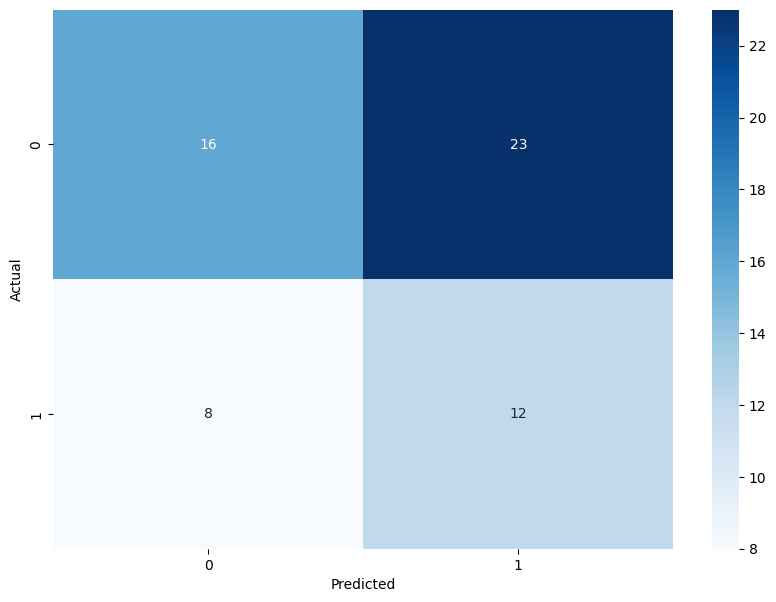

Metrics for k = 7
Validation Accuracy: 0.5932203389830508
Validation Precision: 0.5950516267290085
Validation Recall: 0.5932203389830508
Validation F1 Score: 0.5934541203974285



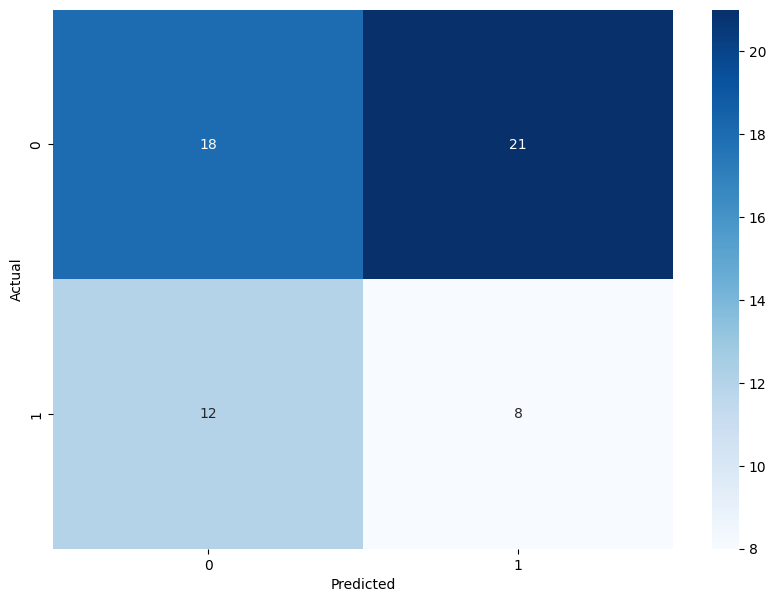

Best k value: 5


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the k values to compare
k_values = [3, 5, 7]

# Create dictionaries to store the performance metrics for each k value
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores_k = {}
cm = {}

# Iterate over the k values
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels for the validation data
    y_pred_val = knn.predict(X_val)

    # Calculate the accuracy, precision, recall, and F1 score on the validation data
    accuracy_scores[k] = accuracy_score(y_val, y_pred_val)
    precision_scores[k] = precision_score(y_val, y_pred_val, average='weighted')
    recall_scores[k] = recall_score(y_val, y_pred_val, average='weighted')
    f1_scores_k[k] = f1_score(y_val, y_pred_val, average='weighted')

    # Calculate and plot the confusion matrix for the test data
    cm[k] = confusion_matrix(y_test, y_pred_val)

for k in k_values:
    # Print the performance metrics for each k value
    print("Metrics for k =", k)
    print("Validation Accuracy:", accuracy_scores[k])
    print("Validation Precision:", precision_scores[k])
    print("Validation Recall:", recall_scores[k])
    print("Validation F1 Score:", f1_scores_k[k])
    print()

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm[k], annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Select the best k value based on the validation metrics
best_k = max(f1_scores_k, key=f1_scores_k.get)
print("Best k value:", best_k)

# Create a KNN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_knn = knn.predict(X_test)

##**Base Naive Bayes Classifier**

Validation Accuracy: 0.8813559322033898
Validation Precision: 0.8859251737873937
Validation Recall: 0.8813559322033898
Validation F1 Score: 0.8813559322033898
Test Accuracy: 0.9661016949152542
Test Precision: 0.9661016949152542
Test Recall: 0.9661016949152542
Test F1 Score: 0.9661016949152542


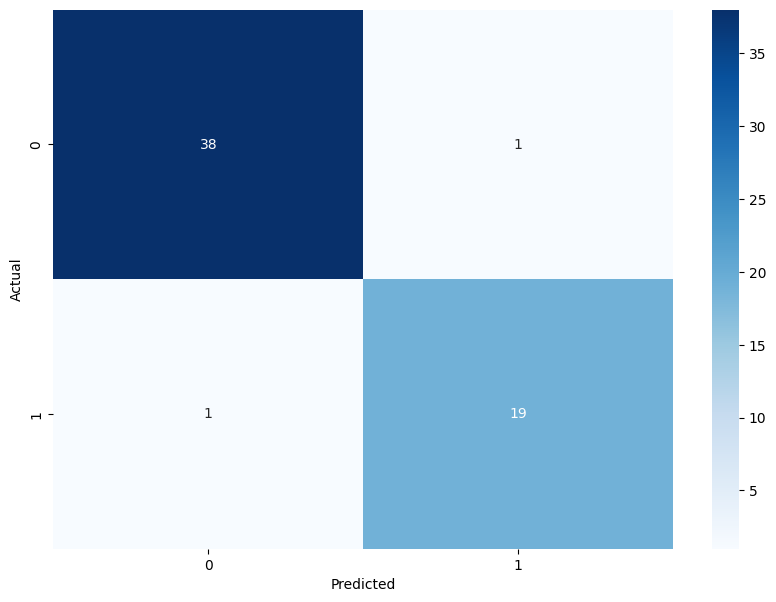

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier
nb = GaussianNB()

# Fit the classifier to the training data
nb.fit(X_train, y_train)

# Predict the labels for the validation data
y_pred_val = nb.predict(X_val)

# Calculate the accuracy, precision, recall, and F1 score on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='weighted')
recall_val = recall_score(y_val, y_pred_val, average='weighted')
f1_val = f1_score(y_val, y_pred_val, average='weighted')

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1 Score:", f1_val)

# Predict the labels for the test data
y_pred_nb = nb.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print("Test Accuracy:", accuracy_nb)
print("Test Precision:", precision_nb)
print("Test Recall:", recall_nb)
print("Test F1 Score:", f1_nb)

# Calculate and plot the confusion matrix for the test data
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##**Base Decision Tree Classifier**

Validation Accuracy: 1.0
Validation Precision: 1.0
Validation Recall: 1.0
Validation F1 Score: 1.0
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


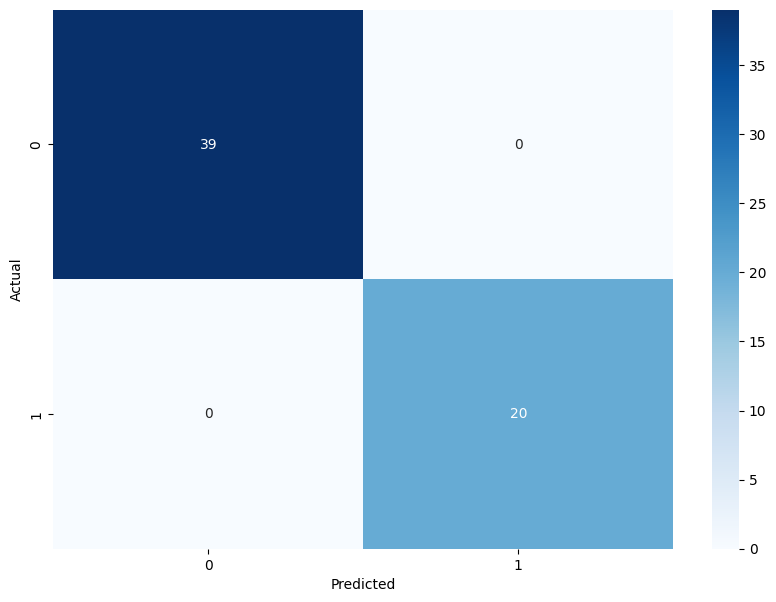

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the classifier to the training data
dt.fit(X_train, y_train)

# Predict the labels for the validation data
y_pred_val = dt.predict(X_val)

# Calculate the accuracy, precision, recall, and F1 score on the validation data
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='weighted')
recall_val = recall_score(y_val, y_pred_val, average='weighted')
f1_val = f1_score(y_val, y_pred_val, average='weighted')

print("Validation Accuracy:", accuracy_val)
print("Validation Precision:", precision_val)
print("Validation Recall:", recall_val)
print("Validation F1 Score:", f1_val)

# Predict the labels for the test data
y_pred_dt = dt.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Test Accuracy:", accuracy_dt)
print("Test Precision:", precision_dt)
print("Test Recall:", recall_dt)
print("Test F1 Score:", f1_dt)

# Calculate and plot the confusion matrix for the test data
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##**Feature Scaling**

Scalers used :
*   StandardScaler
*   MinMaxScaler

### KNN with Feature Scaling

Metrics for StandardScaler
Scaler Accuracy: 0.8983050847457628
Scaler Precision: 0.9051654560129136
Scaler Recall: 0.8983050847457628
Scaler F1 Score: 0.8974754059499821


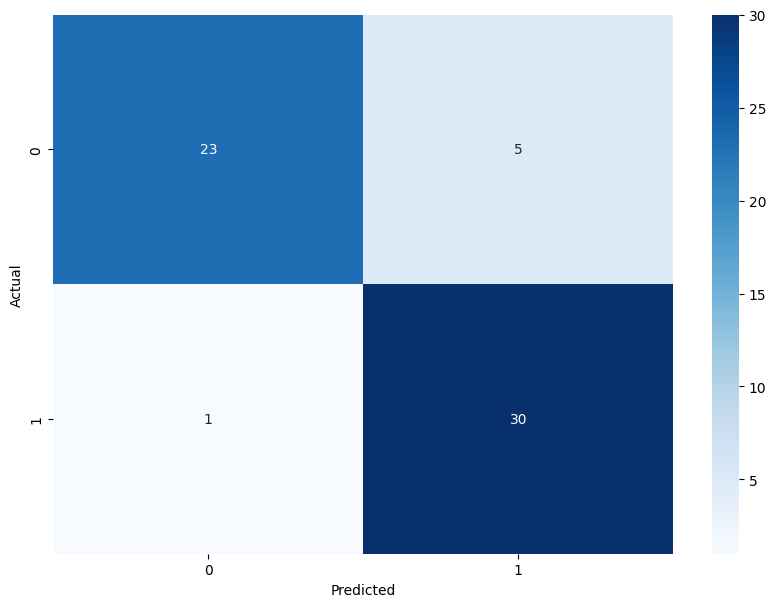

Metrics for MinMaxScaler
Scaler Accuracy: 0.864406779661017
Scaler Precision: 0.8790238620747095
Scaler Recall: 0.864406779661017
Scaler F1 Score: 0.8622532402791625


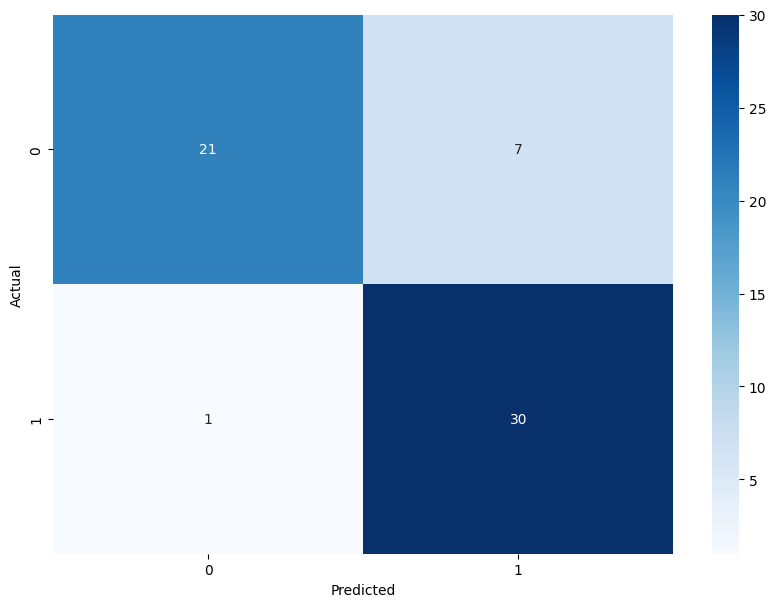

F1 Score for StandardScaler: 0.8974754059499821
F1 Score for MinMaxScaler: 0.8622532402791625
Best Scaler: StandardScaler
Test Accuracy: 0.8135593220338984
Test Precision: 0.8797156916347731
Test Recall: 0.8135593220338984
Test F1 Score: 0.8183608378843569


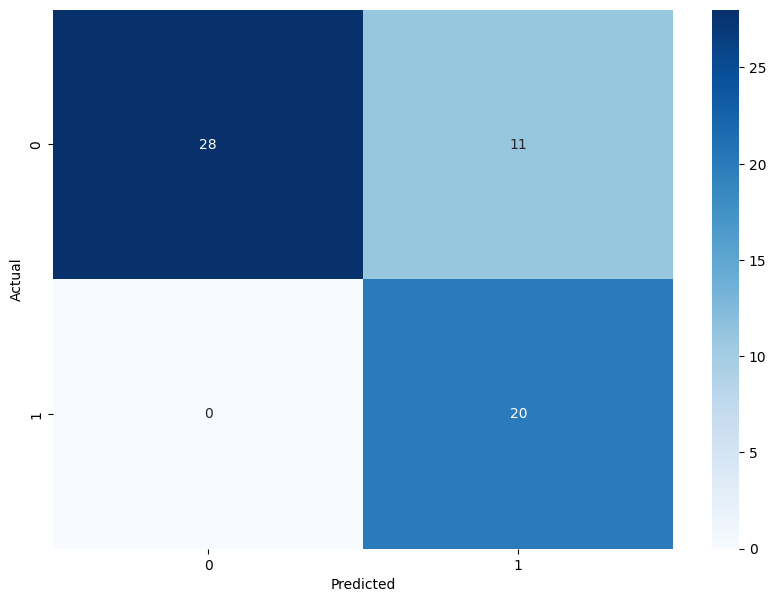

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create dictionaries to store the F1 scores for each scaler
f1_scores_scalers = {}

# Define the scaling methods to compare
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Iterate over the scalers
for scaler_name, scaler in scalers.items():
    # Scale the training, validation, and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=best_k)

    # Fit the classifier to the scaled training data
    knn.fit(X_train_scaled, y_train)

    # Predict the labels for the validation data
    y_pred_val = knn.predict(X_val_scaled)

    # Calculate the accuracy, precision, recall, and F1 score on the validation data
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val, average='weighted')
    recall_val = recall_score(y_val, y_pred_val, average='weighted')
    f1_scores_scalers[scaler_name] = f1_score(y_val, y_pred_val, average='weighted')

    print("Metrics for", scaler_name)

    print("Scaler Accuracy:", accuracy_val)
    print("Scaler Precision:", precision_val)
    print("Scaler Recall:", recall_val)
    print("Scaler F1 Score:", f1_scores_scalers[scaler_name])

    # Calculate and plot the confusion matrix for the test data
    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print the F1 scores for each scaler
for scaler_name, f1 in f1_scores_scalers.items():
    print(f"F1 Score for {scaler_name}: {f1}")

# Select the scaler with the best F1 score
best_scaler = max(f1_scores_scalers, key=f1_scores_scalers.get)
print("Best Scaler:", best_scaler)

# Scale the training and test data using the best scaler
best_scaler_obj = scalers[best_scaler]
X_train_scaled = best_scaler_obj.fit_transform(X_train)
X_test_scaled = best_scaler_obj.transform(X_test)

# Create a KNN classifier using the best scaler
knn_scaled = KNeighborsClassifier(n_neighbors=best_k)

# Fit the classifier to the scaled training data
knn_scaled.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred_knn_scaled = knn_scaled.predict(X_test_scaled)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_knn_scaled = accuracy_score(y_test, y_pred_knn_scaled)
precision_knn_scaled = precision_score(y_test, y_pred_knn_scaled, average='weighted')
recall_knn_scaled = recall_score(y_test, y_pred_knn_scaled, average='weighted')
f1_knn_scaled = f1_score(y_test, y_pred_knn_scaled, average='weighted')

print("Test Accuracy:", accuracy_knn_scaled)
print("Test Precision:", precision_knn_scaled)
print("Test Recall:", recall_knn_scaled)
print("Test F1 Score:", f1_knn_scaled)

# Calculate and plot the confusion matrix for the test data
cm_knn_scaled = confusion_matrix(y_test, y_pred_knn_scaled)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn_scaled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Naive Bayes with Feature Scaling

Metrics for StandardScaler
Scaler Accuracy: 0.8813559322033898
Scaler Precision: 0.8859251737873937
Scaler Recall: 0.8813559322033898
Scaler F1 Score: 0.8813559322033898


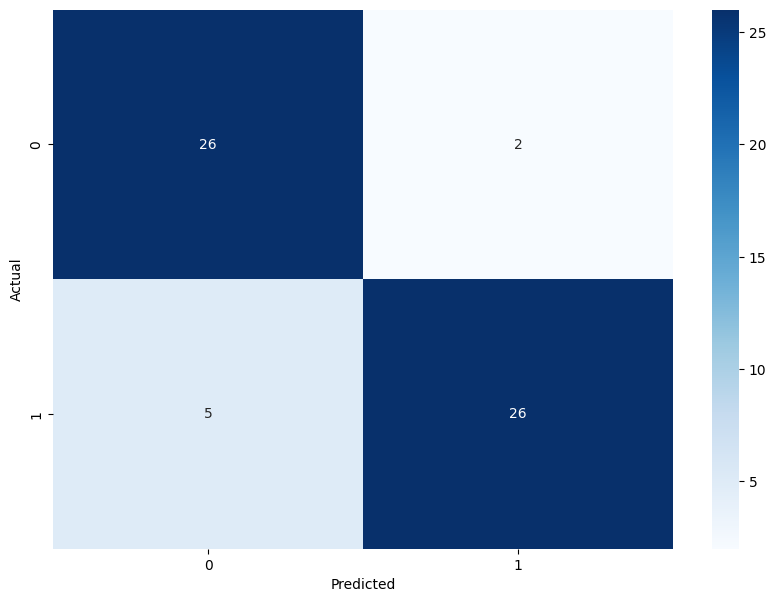

Metrics for MinMaxScaler
Scaler Accuracy: 0.8813559322033898
Scaler Precision: 0.8859251737873937
Scaler Recall: 0.8813559322033898
Scaler F1 Score: 0.8813559322033898


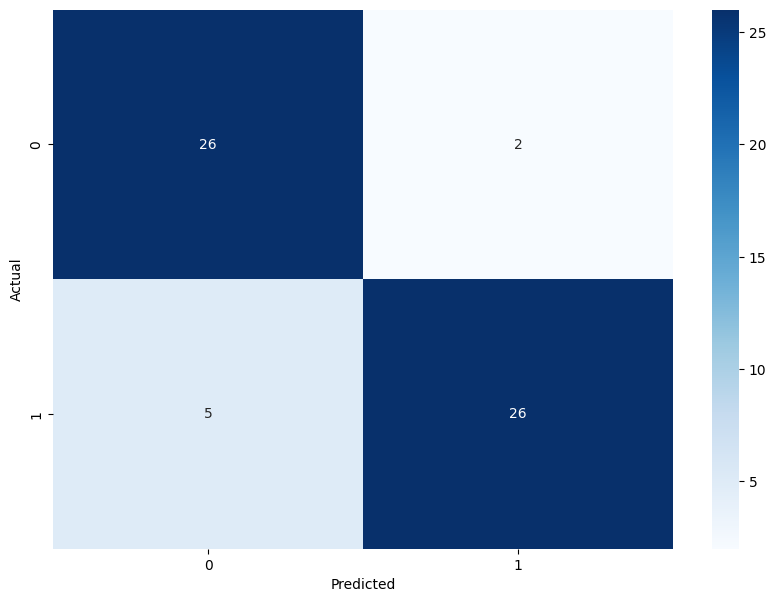

F1 Score for StandardScaler: 0.8813559322033898
F1 Score for MinMaxScaler: 0.8813559322033898
Best Scaler: StandardScaler
Test Accuracy: 0.9661016949152542
Test Precision: 0.9661016949152542
Test Recall: 0.9661016949152542
Test F1 Score: 0.9661016949152542


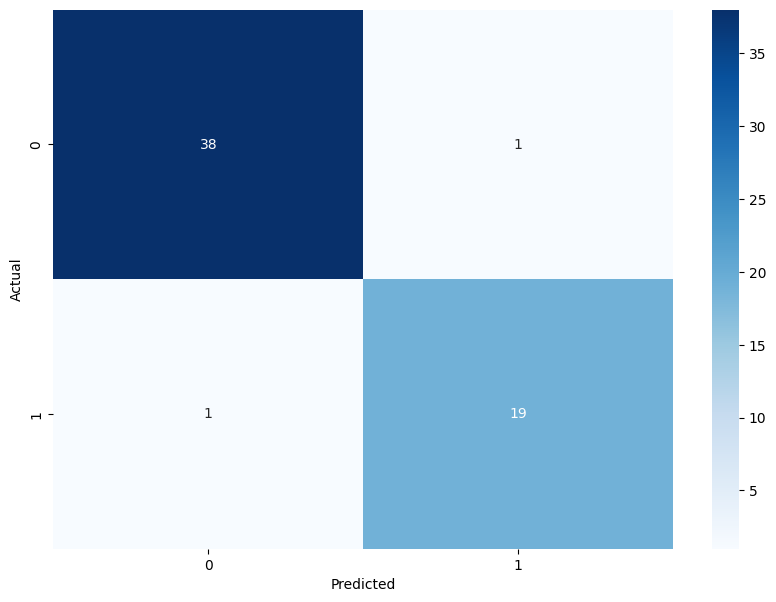

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create dictionaries to store the F1 scores for each scaler
f1_scores_scalers = {}

# Define the scaling methods to compare
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Iterate over the scalers
for scaler_name, scaler in scalers.items():
    # Scale the training, validation, and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Create a Naive Bayes classifier
    nb = GaussianNB()

    # Fit the classifier to the scaled training data
    nb.fit(X_train_scaled, y_train)

    # Predict the labels for the validation data
    y_pred_val = nb.predict(X_val_scaled)

    # Calculate the accuracy, precision, recall, and F1 score on the validation data
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val, average='weighted')
    recall_val = recall_score(y_val, y_pred_val, average='weighted')
    f1_scores_scalers[scaler_name] = f1_score(y_val, y_pred_val, average='weighted')

    print("Metrics for", scaler_name)

    print("Scaler Accuracy:", accuracy_val)
    print("Scaler Precision:", precision_val)
    print("Scaler Recall:", recall_val)
    print("Scaler F1 Score:", f1_scores_scalers[scaler_name])

    # Calculate and plot the confusion matrix for the test data
    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print the F1 scores for each scaler
for scaler_name, f1 in f1_scores_scalers.items():
    print(f"F1 Score for {scaler_name}: {f1}")

# Select the scaler with the best F1 score
best_scaler = max(f1_scores_scalers, key=f1_scores_scalers.get)
print("Best Scaler:", best_scaler)

# Scale the training and test data using the best scaler
best_scaler_obj = scalers[best_scaler]
X_train_scaled = best_scaler_obj.fit_transform(X_train)
X_test_scaled = best_scaler_obj.transform(X_test)

# Create a KNN classifier using the best scaler
nb_scaled = GaussianNB()

# Fit the classifier to the scaled training data
nb_scaled.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred_nb_scaled = nb_scaled.predict(X_test_scaled)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_nb_scaled = accuracy_score(y_test, y_pred_nb_scaled)
precision_nb_scaled = precision_score(y_test, y_pred_nb_scaled, average='weighted')
recall_nb_scaled = recall_score(y_test, y_pred_nb_scaled, average='weighted')
f1_nb_scaled = f1_score(y_test, y_pred_nb_scaled, average='weighted')

print("Test Accuracy:", accuracy_nb_scaled)
print("Test Precision:", precision_nb_scaled)
print("Test Recall:", recall_nb_scaled)
print("Test F1 Score:", f1_nb_scaled)

# Calculate and plot the confusion matrix for the test data
cm_nb_scaled = confusion_matrix(y_test, y_pred_nb_scaled)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb_scaled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Decision Tree with Feature Scaling

Metrics for StandardScaler
Scaler Accuracy: 1.0
Scaler Precision: 1.0
Scaler Recall: 1.0
Scaler F1 Score: 1.0


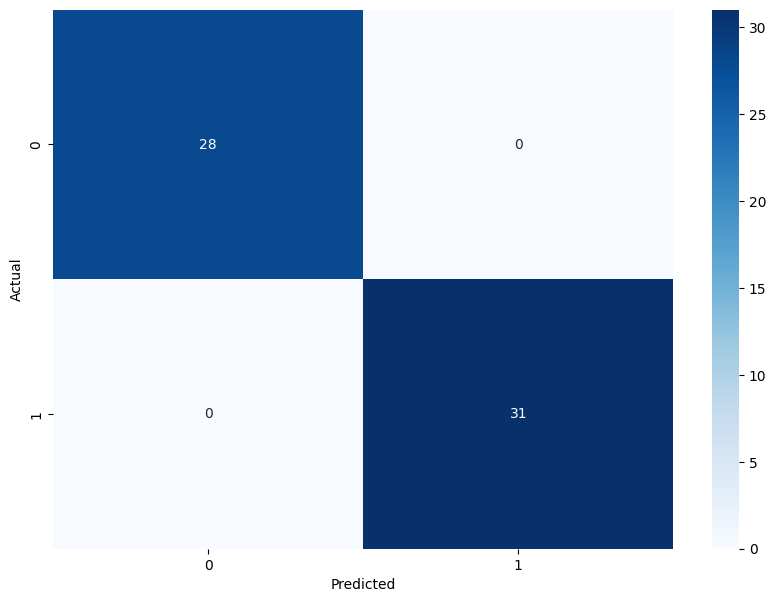

Metrics for MinMaxScaler
Scaler Accuracy: 1.0
Scaler Precision: 1.0
Scaler Recall: 1.0
Scaler F1 Score: 1.0


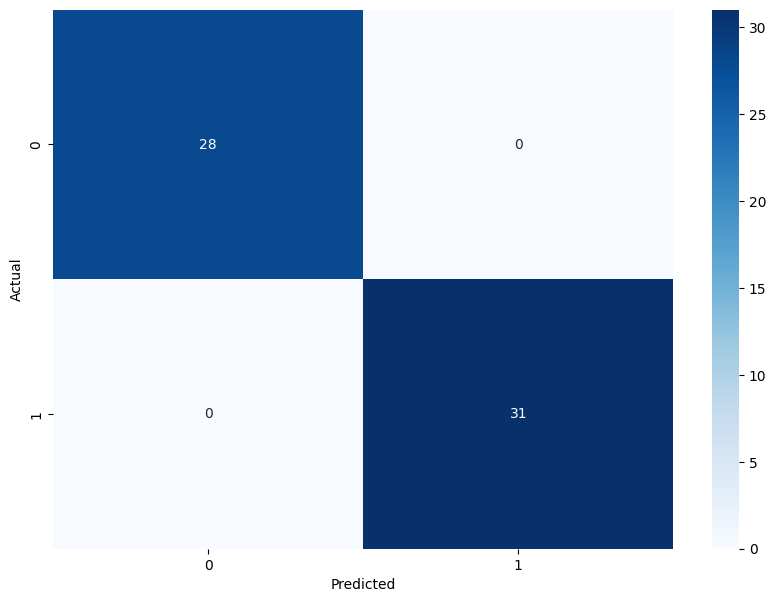

F1 Score for StandardScaler: 1.0
F1 Score for MinMaxScaler: 1.0
Best Scaler: StandardScaler
Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


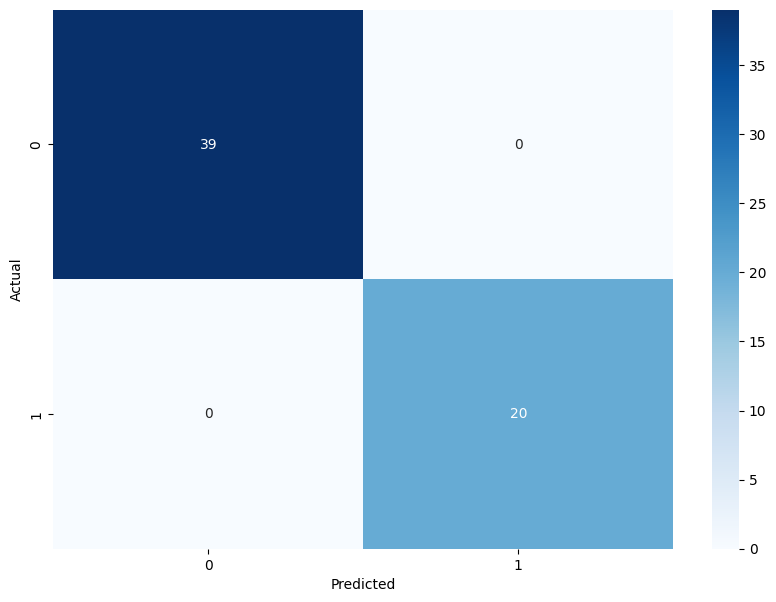

In [ ]:
# Iterate over the scalers
for scaler_name, scaler in scalers.items():
    # Scale the training, validation, and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Create a Decision Tree classifier
    dt = DecisionTreeClassifier()

    # Fit the classifier to the scaled training data
    dt.fit(X_train_scaled, y_train)

    # Predict the labels for the validation data
    y_pred_val = dt.predict(X_val_scaled)

    # Calculate the accuracy, precision, recall, and F1 score on the validation data
    accuracy_val = accuracy_score(y_val, y_pred_val)
    precision_val = precision_score(y_val, y_pred_val, average='weighted')
    recall_val = recall_score(y_val, y_pred_val, average='weighted')
    f1_scores_scalers[scaler_name] = f1_score(y_val, y_pred_val, average='weighted')

    print("Metrics for", scaler_name)

    print("Scaler Accuracy:", accuracy_val)
    print("Scaler Precision:", precision_val)
    print("Scaler Recall:", recall_val)
    print("Scaler F1 Score:", f1_scores_scalers[scaler_name])

    # Calculate and plot the confusion matrix for the test data
    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print the F1 scores for each scaler
for scaler_name, f1 in f1_scores_scalers.items():
    print(f"F1 Score for {scaler_name}: {f1}")

# Select the scaler with the best F1 score
best_scaler = max(f1_scores_scalers, key=f1_scores_scalers.get)
print("Best Scaler:", best_scaler)

# Scale the training and test data using the best scaler
best_scaler_obj = scalers[best_scaler]
X_train_scaled = best_scaler_obj.fit_transform(X_train)
X_test_scaled = best_scaler_obj.transform(X_test)

# Create a KNN classifier using the best scaler
dt_scaled = DecisionTreeClassifier()

# Fit the classifier to the scaled training data
dt_scaled.fit(X_train_scaled, y_train)

# Predict the labels for the test data
y_pred_dt_scaled = dt_scaled.predict(X_test_scaled)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_dt_scaled = accuracy_score(y_test, y_pred_dt_scaled)
precision_dt_scaled = precision_score(y_test, y_pred_dt_scaled, average='weighted')
recall_dt_scaled = recall_score(y_test, y_pred_dt_scaled, average='weighted')
f1_dt_scaled = f1_score(y_test, y_pred_dt_scaled, average='weighted')

print("Test Accuracy:", accuracy_dt_scaled)
print("Test Precision:", precision_dt_scaled)
print("Test Recall:", recall_dt_scaled)
print("Test F1 Score:", f1_dt_scaled)

# Calculate and plot the confusion matrix for the test data
cm_dt_scaled = confusion_matrix(y_test, y_pred_dt_scaled)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt_scaled, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Feature Selection**

### Scaled KNN with Feature Selection

Test Accuracy: 0.9491525423728814
Test Precision: 0.9557848194546794
Test Recall: 0.9491525423728814
Test F1 Score: 0.9499093417422153


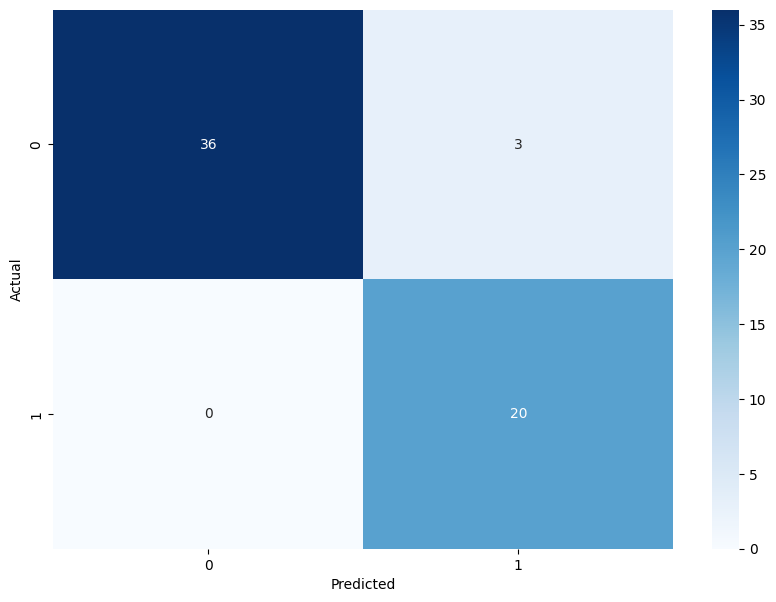

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Apply SelectKBest for feature selection
k_best = SelectKBest(score_func=mutual_info_classif, k=5)  # Select 5 best features
X_train_kbest = k_best.fit_transform(X_train_scaled, y_train)

# Train the classifier using the transformed training data
knn_scaled.fit(X_train_kbest, y_train)

# Apply the same feature selection on the testing data
X_test_kbest = k_best.transform(X_test_scaled)

# Predict the labels of the transformed testing data
y_pred_knn_fs = knn_scaled.predict(X_test_kbest)


# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_knn_fs = accuracy_score(y_test, y_pred_knn_fs)
precision_knn_fs = precision_score(y_test, y_pred_knn_fs, average='weighted')
recall_knn_fs = recall_score(y_test, y_pred_knn_fs, average='weighted')
f1_knn_fs = f1_score(y_test, y_pred_knn_fs, average='weighted')

print("Test Accuracy:", accuracy_knn_fs)
print("Test Precision:", precision_knn_fs)
print("Test Recall:", recall_knn_fs)
print("Test F1 Score:", f1_knn_fs)

# Calculate and plot the confusion matrix for the test data
cm_knn_fs = confusion_matrix(y_test, y_pred_knn_fs)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn_fs, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Scaled Naive Bayes with Feature Selection

Test Accuracy: 0.9830508474576272
Test Precision: 0.9838579499596449
Test Recall: 0.9830508474576272
Test F1 Score: 0.9831474850077578


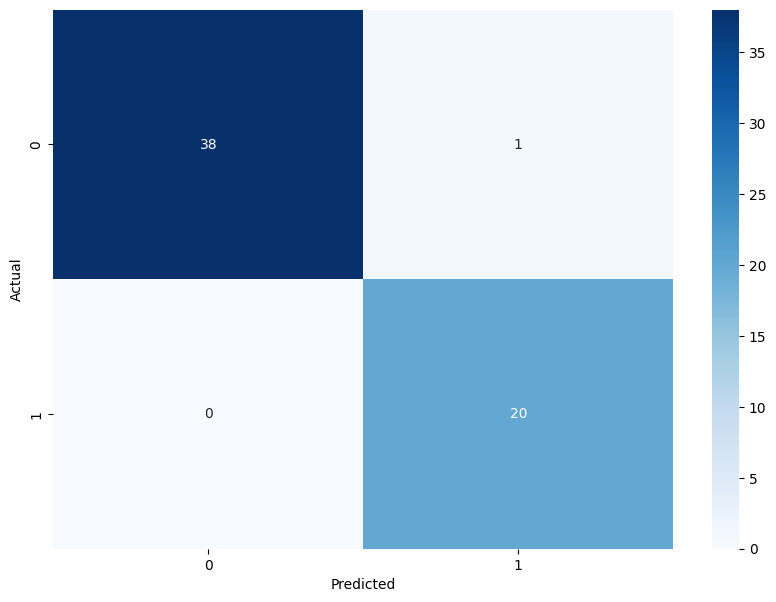

In [ ]:
# Train the classifier using the transformed training data
nb_scaled.fit(X_train_kbest, y_train)

# Predict the labels of the transformed testing data
y_pred_nb_fs = nb_scaled.predict(X_test_kbest)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_nb_fs = accuracy_score(y_test, y_pred_nb_fs)
precision_nb_fs = precision_score(y_test, y_pred_nb_fs, average='weighted')
recall_nb_fs = recall_score(y_test, y_pred_nb_fs, average='weighted')
f1_nb_fs = f1_score(y_test, y_pred_nb_fs, average='weighted')

print("Test Accuracy:", accuracy_nb_fs)
print("Test Precision:", precision_nb_fs)
print("Test Recall:", recall_nb_fs)
print("Test F1 Score:", f1_nb_fs)

# Calculate and plot the confusion matrix for the test data
cm_nb_fs = confusion_matrix(y_test, y_pred_nb_fs)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb_fs, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Scaled Decision Tree with Feature Selection

Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


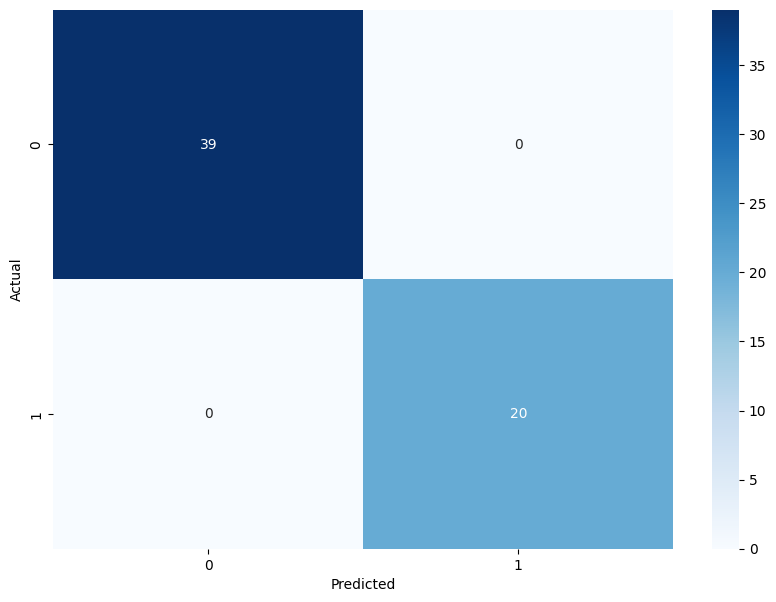

In [ ]:
# Train the classifier using the transformed training data
dt_scaled.fit(X_train_kbest, y_train)

# Predict the labels of the transformed testing data
y_pred_dt_fs = dt_scaled.predict(X_test_kbest)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_dt_fs = accuracy_score(y_test, y_pred_dt_fs)
precision_dt_fs = precision_score(y_test, y_pred_dt_fs, average='weighted')
recall_dt_fs = recall_score(y_test, y_pred_dt_fs, average='weighted')
f1_dt_fs = f1_score(y_test, y_pred_dt_fs, average='weighted')

print("Test Accuracy:", accuracy_dt_fs)
print("Test Precision:", precision_dt_fs)
print("Test Recall:", recall_dt_fs)
print("Test F1 Score:", f1_dt_fs)

# Calculate and plot the confusion matrix for the test data
cm_dt_fs = confusion_matrix(y_test, y_pred_dt_fs)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt_fs, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##**Dimensional Reduction Using PCA**

### Scaled KNN with PCA

Test Accuracy: 0.9491525423728814
Test Precision: 0.9503207170468544
Test Recall: 0.9491525423728814
Test F1 Score: 0.9494424550232736


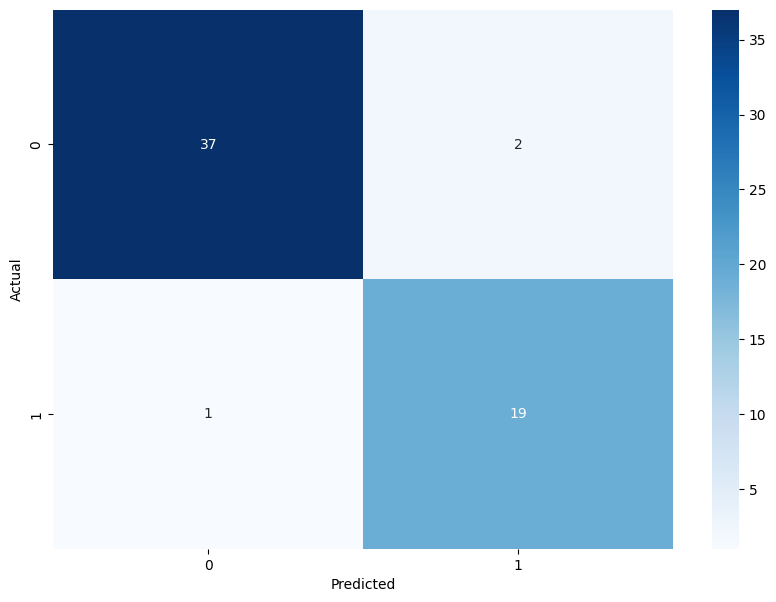

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5, iterated_power=1)
X_train_pca = pca.fit_transform(X_train_scaled, y_train)

# Train the classifier using the transformed training data
knn_scaled.fit(X_train_pca, y_train)

# Apply the same PCA on the testing data
X_test_pca = pca.transform(X_test_scaled)

# Predict the labels of the transformed testing data
y_pred_knn_pca = knn_scaled.predict(X_test_pca)


# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
precision_knn_pca = precision_score(y_test, y_pred_knn_pca, average='weighted')
recall_knn_pca = recall_score(y_test, y_pred_knn_pca, average='weighted')
f1_knn_pca = f1_score(y_test, y_pred_knn_pca, average='weighted')

print("Test Accuracy:", accuracy_knn_pca)
print("Test Precision:", precision_knn_pca)
print("Test Recall:", recall_knn_pca)
print("Test F1 Score:", f1_knn_pca)

# Calculate and plot the confusion matrix for the test data
cm_knn_pca = confusion_matrix(y_test, y_pred_knn_pca)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn_pca, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Scaled Naive Bayes with PCA

Test Accuracy: 0.9830508474576272
Test Precision: 0.9838579499596449
Test Recall: 0.9830508474576272
Test F1 Score: 0.9831474850077578


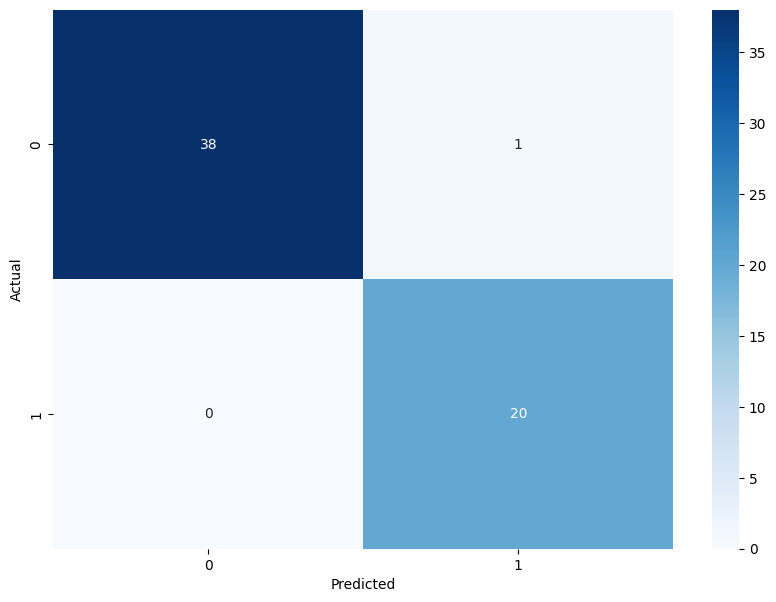

In [ ]:
# Train the classifier using the transformed training data
nb_scaled.fit(X_train_kbest, y_train)

# Predict the labels of the transformed testing data
y_pred_nb_pca = nb_scaled.predict(X_test_kbest)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_nb_pca = accuracy_score(y_test, y_pred_nb_pca)
precision_nb_pca = precision_score(y_test, y_pred_nb_pca, average='weighted')
recall_nb_pca = recall_score(y_test, y_pred_nb_pca, average='weighted')
f1_nb_pca = f1_score(y_test, y_pred_nb_pca, average='weighted')

print("Test Accuracy:", accuracy_nb_pca)
print("Test Precision:", precision_nb_pca)
print("Test Recall:", recall_nb_pca)
print("Test F1 Score:", f1_nb_pca)

# Calculate and plot the confusion matrix for the test data
cm_nb_pca = confusion_matrix(y_test, y_pred_nb_pca)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb_pca, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Scaled Decision Tree with PCA

Test Accuracy: 1.0
Test Precision: 1.0
Test Recall: 1.0
Test F1 Score: 1.0


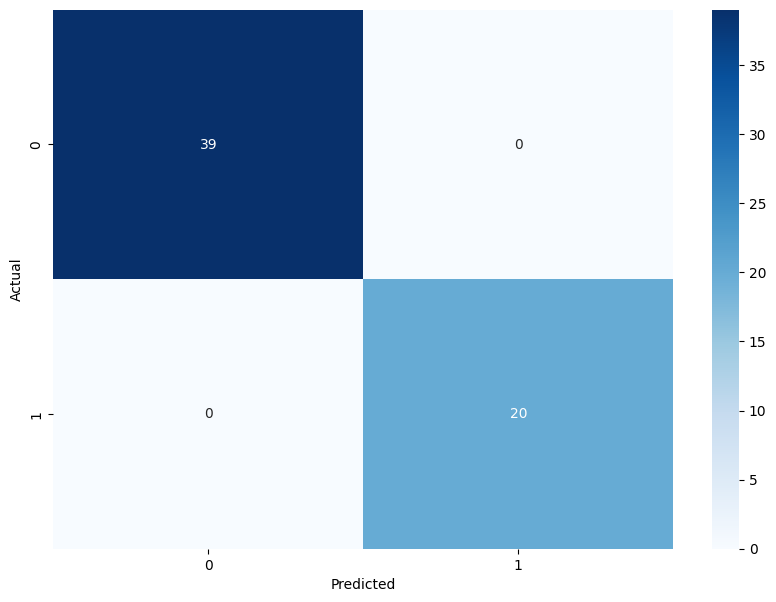

In [ ]:
# Train the classifier using the transformed training data
dt_scaled.fit(X_train_kbest, y_train)

# Predict the labels of the transformed testing data
y_pred_dt_pca = dt_scaled.predict(X_test_kbest)

# Calculate the accuracy, precision, recall, and F1 score on the test data
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
precision_dt_pca = precision_score(y_test, y_pred_dt_pca, average='weighted')
recall_dt_pca = recall_score(y_test, y_pred_dt_pca, average='weighted')
f1_dt_pca = f1_score(y_test, y_pred_dt_pca, average='weighted')

print("Test Accuracy:", accuracy_dt_pca)
print("Test Precision:", precision_dt_pca)
print("Test Recall:", recall_dt_pca)
print("Test F1 Score:", f1_dt_pca)

# Calculate and plot the confusion matrix for the test data
cm_dt_pca = confusion_matrix(y_test, y_pred_dt_pca)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt_pca, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()